In [80]:
# --- Data Manipulation  ---
#import numpy and pandas 
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.stats import norm
from scipy import stats


# --- Data Visualization ---
#import Seaborn and the module pyplot of matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# --- Maths ---
#import the library maths

In [81]:
# Download the dataset 'tips' of seaborn and display tips
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 🧐  2.1) Exploratory Data Analysis (EDA)

❓ How many rows are available in the dataset ❓

In [82]:
n_rows, n_cols = df.shape
print("Nombre de lignes :", n_rows)
print("Nombre de colonnes :", n_cols)

Nombre de lignes : 244
Nombre de colonnes : 7


❓ Plot the distribution of the `tip` column 📊 (with 20 bins) ❓

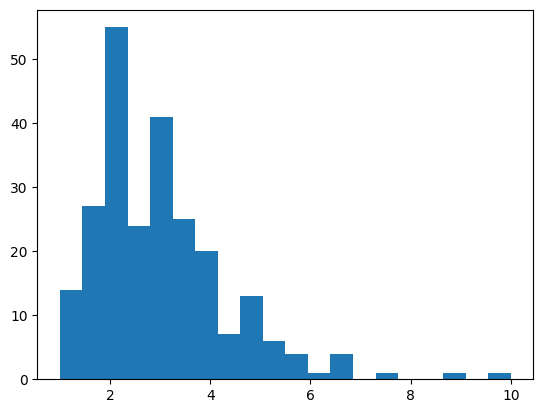

In [83]:
# plot as histogram the tips dataframe 
plt.hist(df["tip"], bins=20)
plt.show()

❓ Question 1 ❓

What are :
* the ***average tip***
* the ***standard deviation tip*** 
* the  [***skewness of the tips***](https://whatis.techtarget.com/definition/skewness)

of the tips? 

Store them into three variables called respectively `tips_mu`, `tips_sigma` and `tips_skew`

In [84]:
tips_mu = df["tip"].mean()
tips_sigma = df["tip"].std()
tips_skew = df["tip"].skew()
print('Average tip: {}\nStandard deviation tip: {}\nSkewness of the tips;: {}'.format(tips_mu,tips_sigma,tips_skew))

Average tip: 2.99827868852459
Standard deviation tip: 1.3836381890011822
Skewness of the tips;: 1.4654510370979401


❓ Question 2 ❓

What is the skewness of the tips: left, right, non-skewed? Store your answer in a string variable called `skewness`

In [85]:
skewness = "right" 

In [86]:
df["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<details>
    <summary>Answer for the question related to the skewness:</summary>

* the "mode" seems to be around 2 dollars `(we can't really talk about a mode for a continuous variable but just looking at the histogram with 20 bins, we can give an estimation)
    
* the "mean" is at 2.99 dollars
    
* the median is at 2.90 dollars
    
So here we have $ mode < median < mean $ which correspond to a `right skewness` if you go back to the `Statistics and Probability` slides 😉
    
    
</details>

### 🎲 2.2) Sampling mean

❓ Pick randomly - and with replacement - 10 rows of the dataset, and compute the mean $\bar{X}$ of that sample ❓

👉 Run the cell a few times. Do you get the same result each time? Is this expected?

In [87]:
df.sample(10).mean(numeric_only=True)

total_bill    20.292
tip            2.822
size           2.800
dtype: float64

<div style="color:green">No we don't get the same results each time and it's normal because we take random values</div>

---

## 🔥 3) Applying the CLT

### 3.1) <u>Graphically</u>

👉 Create a `means` list storing a list of means of $N$ samples of size $n$.

Start with $n = 5$ and $N = 10$

📊  In the same cell, **plot** the distribution of `means`. 

🧐 Let's play with the <u>*sample size n*</u> and the <u>*number of samples N</u>*:
* Keep $n$ constant, increase $N$ and observe: display the distributions. What do you conclude?

In [88]:
def clt(values, n, N):
  assert type(values) == np.ndarray
  return [np.mean([values[x] for x in np.random.choice(values.shape[0], n, replace=False)]) for _ in range(N)]

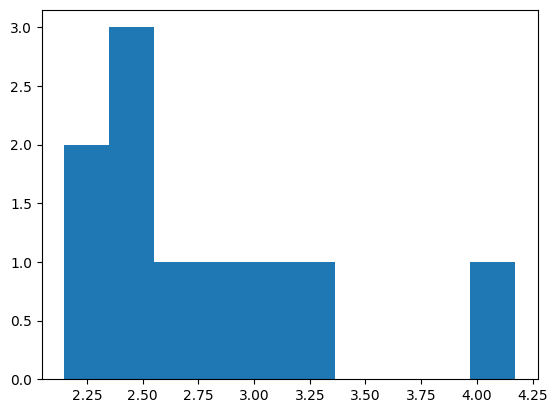

In [89]:
n = 5
N = 10
means = clt(df["tip"].to_numpy(), n, N)

plt.hist(means)
plt.show()

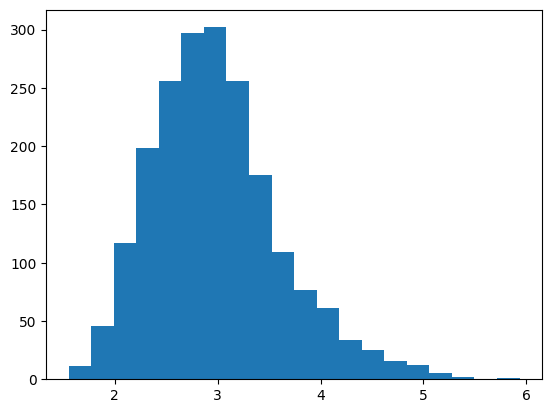

In [90]:
n = 5
N = 2000

means = clt(df["tip"].to_numpy(), n, N)

plt.hist(means, bins=20)
plt.show()

<details>
    <summary>What is happening when <u><i>n is fixed</i></u> and <u><i>N increases:</i></u>?your answer</summary>



<div style="color:green">When we increase the N value (the draw count), a symmetrical bell curve starts to appear</div>

* Now, keep $N$ constant, increase $n$ and observe. What do you conclude?

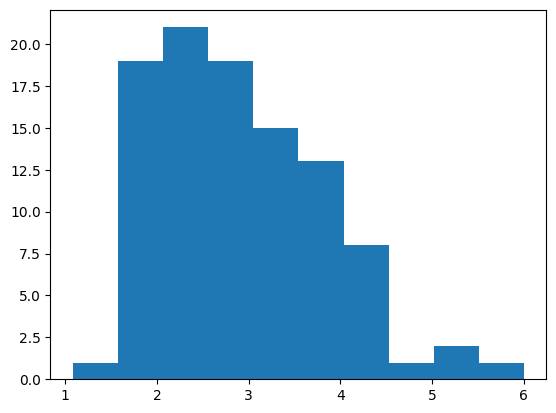

In [91]:
n = 2 
N = 100
means = clt(df["tip"].to_numpy(), n, N)
plt.hist(means, bins=10)
plt.show()

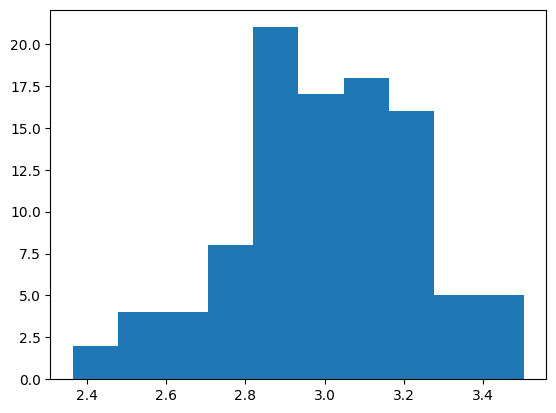

In [92]:
n = 30 
N = 100

means = clt(df["tip"].to_numpy(), n, N)

plt.hist(means, bins=10)
plt.show()

<details>
    <summary>What is happening when <u><i>N is fixed</i></u> and <u><i>n increases</i></u>? YOUR ANSWER</summary>


</details>



<div style="color:green">When we increas the n value (the sample size), a skewness bell curve starts to appear</div>

### 3.2) <u>Numerically</u>

❓ Let's verify the Central Limit Theorem computationally ❓
- Compare `tips_mu` with the mean of means
- Compare `tips_sigma` with the standard deviation of the means, but don't forget the $\sqrt n$ adjustment
- Compute the `skewness` of the distribution of the means using `scipy.stats.skew` (should be close to 0)
- Compute the `kurtosis` of the distribution of the means using `scipy.stats.kurtosis`(should be close to 0)


In [93]:
#  Compare tips_mu with the mean of means
print('Tips mu : {}\nMean of means : {}'.format(tips_mu, np.mean(means)))

Tips mu : 2.99827868852459
Mean of means : 3.00701


In [94]:
# Compare tips_sigma with the standard deviation of the means, but don't forget the n adjustment
means_std = np.sqrt(np.sum((means - np.mean(means))**2) / N)
assert means_std == np.std(means) # to verify our formula
print('Tips sigma : {}\nStandard deviation of the means : {}'.format(tips_sigma, means_std))

Tips sigma : 1.3836381890011822
Standard deviation of the means : 0.2356836271831843


In [95]:
# Compute the skewness of the distribution of the means using scipy.stats.skew (should be close to 0)
print('Skewness : {}'.format(skew(means)))
print("right" if skew(means) > 0 else "left")

Skewness : -0.27451003213327785
left


In [96]:
# Compute the kurtosis of the distribution of the means using scipy.stats.kurtosis (should be close to 0)
print('Kurtosis : {}'.format(kurtosis(means)))

Kurtosis : 0.010429720905124729


## 💪  4) Use case: Probabilities of accumulating large tips at the end of a work-day

🤔 Let's pick 100 dinners from the dataset (sampling with replacement). What is the probability that the cumulated tips ends up being **greater than 350€**?


1️⃣ Before we answer this question, start by familiarizing yourself with the [**`scipy.stats.norm.pdf`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) tool: 

❓ Can you plot a Normal Distribution pdf with a mean(=10) and standard deviation (=7)?

In [97]:
hundred_dinners = df.sample(100)
data = hundred_dinners["tip"]

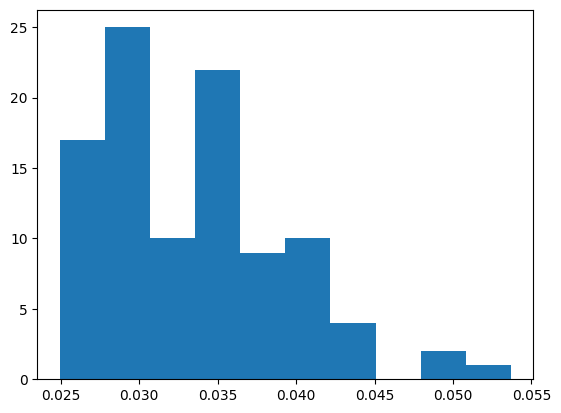

In [98]:
plt.hist(norm.pdf(data, loc=10, scale=7))
plt.show()

🤗 `scipy.stats.norm.pdf` is a **convenient way to draw a Gaussian curve**.

The **probability density function** (_a.k.a._ ***pdf***) of a Normal Distribution with parameters $ \mu $ and $ \sigma $ is defined by:

$$ y = \frac{1}{\sigma \sqrt{2 \pi}} exp[-\frac{1}{2} (\frac{x - \mu}{\sigma})^2]$$

😅 Without this function from Scipy, you would have to define a _Gaussian Probability Density Function_ by yourself to plot the Gaussian Curve.

In [99]:
def gauss(x, sigma, mu):
  return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-1/2 * ((x-mu) / sigma)**2)

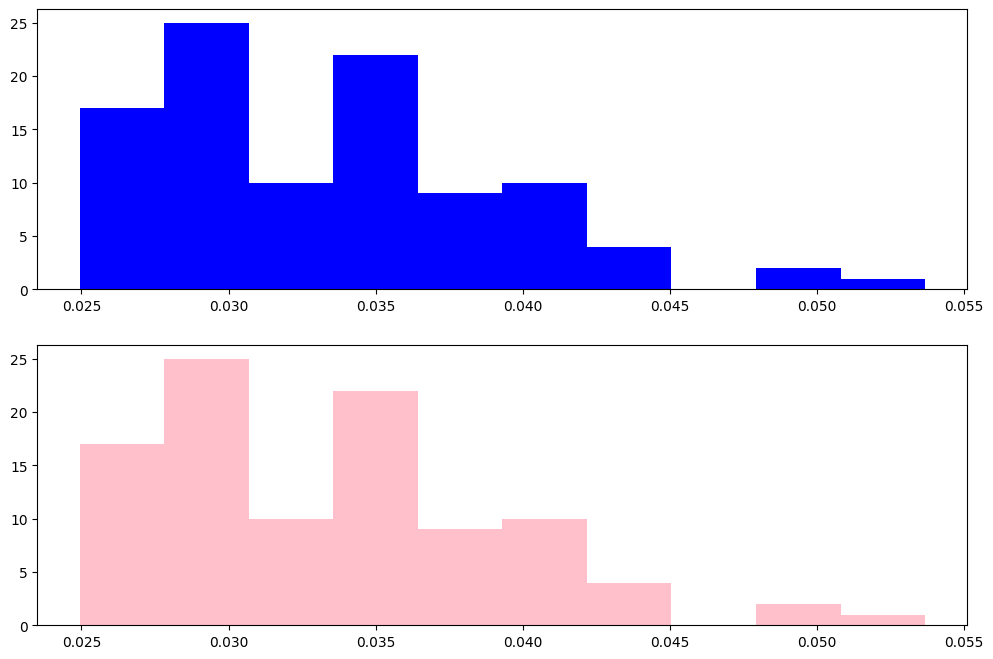

In [100]:
mu_example = 10
sigma_example = 7 

# start a figure
fig, axs = plt.subplots(2, figsize=(12, 8))

# First subplot :
# Plotting a Gaussian distribution using Scipy Stats with the color blue
axs[0].hist(norm.pdf(data, loc=mu_example, scale=sigma_example), color="b")

# Second subplot : 
# Plotting a Gaussian distribution using our own Python function with the color pink
axs[1].hist(gauss(data, mu=mu_example, sigma=sigma_example), color="pink")
plt.show()

2️⃣ Back to our exercise:

<u>The real numbers:</u>

From our Exploratory Data Analysis, we have:
- 244 tips (global population)
- $\mu=3€$
- $\sigma=1.38€$

<u>Sampling once</u>

- Imagine that we draw a sample of size 100 out of the global population of dinners
- We observe the sum of these 100 sample tips is 350€, so the average tip $\mu_X$ is 3.5€ for this sample
- **The operation of drawing a sample is random, therefore the average of these sampled data will also be random**

<u>Distribution of samples</u>

❓ Can you guess what would be the **shape** of the **<u>distribution of the means</u>** of these samples **if we were to <u>draw many other samples</u>** of the same size like this one  

❓ In other words, how do you imagine:
- its shape?
- its mean? (store into a variable called **`mu_expected`**)
- its standard deviation? (store it into a variable called **`sigma_expected`**)

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/ctl.png' width=1000>

<details>
    <summary>🧑🏻‍🏫 YOUR Answer:</summary>


</details>

❓ Plot this expected distribution
- On top of it, add the datapoint representing a cumulated tip of 350€ over 100 dinners.

In [101]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

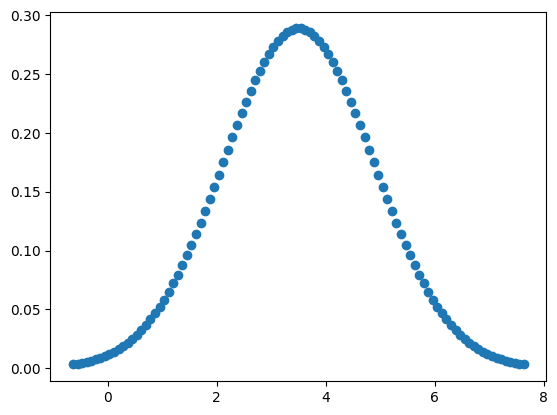

In [103]:
# Expected parameters of the Gaussian variable from the CLT
g_mean = 3.5
g_std = 1.38

# Instantiating this Gaussian Variable
x = np.linspace(g_mean - 3*g_std, g_mean + 3*g_std, len(data))
y = [gauss(xx, g_std, g_mean) for xx in x]

# Plotting the Gaussian Curve
plt.scatter(x, y)

# Additing the targeted point
# plt.scatter(3.5, gauss(3.5, g_std, g_mean), c="r")
plt.show()

👉 For this restaurant, we clearly see that 350 euros of cumulated tips over 100 dinners (average tip of 3.50 euros) seems to be is virtually impossible (this probability of this event would be close to zero).

🍔 It is probably a cheap restaurant serving burgers and fries until 4 AM...

We are almost at the end of the challenge!

🔢 Let's denote $ \bar{X} $ the average tip over 100 dinners 

* ❓ Compute numerically $ \mathbb{P} ( \bar{X} > 3.50 ) $ and store it in `proba_350` variable ❓
* 📚 You will need the **`cumulative distribution function (cdf)`** from [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [104]:
proba_350 =  1 - norm.cdf(3.50)
proba_350

0.0002326290790355401

In [105]:
print(f"Probability to observe total tips greater than 350€ = {round(proba_350*100,2)} %")

Probability to observe total tips greater than 350€ = 0.02 %


❗️ If we had observed such an amount, we could have deduced with a 99.99% confidence level that the 100 dinners selected were ***not randomly sampled*** from the population of dinners.

## ⭐️  5) The `z-score`

<u>**Alternative computation using z-score**</u>

🤔 Imagine you didn't have access to the `SciPy` library (or even to a computer) to compute the probability density function of a custom-made Gaussian distribution numerically. Which workaround could we use to this end?  

💡 Instead of computing a Gaussian distribution with specific mean and sigma, a much more elegant way is to rephrase our problem to use the **`Standard Normal distribution`** $\mathcal N(0,1)$, from which we could read usual values in a **`Standard Statistical table`** 👇

$$ X \sim \mathcal N(\mu,\sigma) \leftrightarrow Y =  \frac{X - \mu}{\sigma} \sim \mathcal N(0,1) $$

In [106]:
standard_deviation = np.std(data)
mean = np.mean(data)
zscores = np.array([(value - mean) / standard_deviation for value in data])
zscores_series = pd.Series(zscores).sort_values(ascending=True)
zscores_series

61   -1.461666
76   -1.461666
11   -1.461666
26   -1.254373
22   -1.163164
        ...   
69    1.979402
52    1.987694
93    2.684199
9     3.098786
85    3.994293
Length: 100, dtype: float64

❓ Use the standard table above to find the probability we are looking for.

> A `z-score` of $3.62$ corresponds to an area under the curve of the Normal distribution $ \mathcal{N}(0,1)$ with a surface equal to $0.9998$

> Hence, the probability of having the sum of tips greater than 350 euros is equal to  $0.0002$

❓ Double-check this probability with with `scipy.stats.norm` as done previously. Store it into a `proba_z` variable.

In [107]:
proba_z = stats.zscore(data).sort_values(ascending=True)
proba_z

67    -1.461666
236   -1.461666
92    -1.461666
75    -1.254373
146   -1.163164
         ...   
172    1.979402
211    1.987694
47     2.684199
214    3.098786
23     3.994293
Name: tip, Length: 100, dtype: float64

(0.9998526984920926, 0.0001473015079074269)

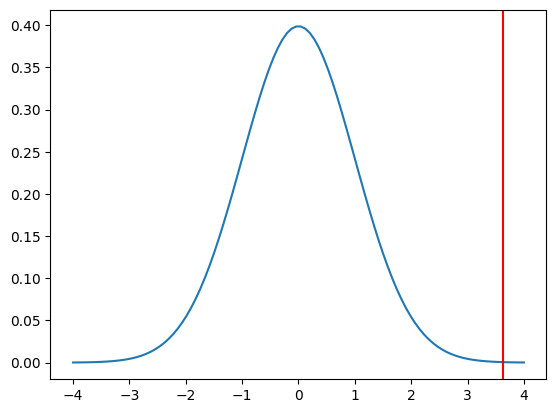

In [108]:
# --- Drawing a Standard Gaussian Curve with mean 0 and std 1
mu, sigma = 0, 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, 0, 1))

# --- Adding the z-score of the observations on top of it
plt.axvline(3.62, c="r")

# --- Computing the cdf of z
proba_362 = norm.cdf(3.62)

# --- Computing and display the proba that the standard gaussian is above the z-score
proba_greaterthan_362 = 1 - norm.cdf(3.62)
proba_362, proba_greaterthan_362
# 0.01% 